<a href="https://colab.research.google.com/github/freyaldi/ML/blob/main/food_classifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Roadmap
1. Convolution Layer
2. Max Pooling
3. 1 Hidden Layer Consist of 100 Neurons ReLu
4. Output Layer 2 Neurons, Softmax activiton function



## Import Required Libraries

In [89]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
from google.colab import files
# from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

##Download The Inception V3 Weights

In [74]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
#     -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-05-25 14:13:40--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   147MB/s    in 0.6s    

2023-05-25 14:13:41 (147 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [75]:
# # Import the inception model  
# from tensorflow.keras.applications.inception_v3 import InceptionV3

# # Create an instance of the inception model from the local pre-trained weights
# local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

##Pre-trained Model Function

In [78]:
# def create_pre_trained_model(local_weights_file):

#   pre_trained_model = InceptionV3(input_shape = (256, 256, 3),
#                                   include_top = False, 
#                                   weights = None) 

#   pre_trained_model.load_weights(local_weights_file)

#   # Make all the layers in the pre-trained model non-trainable
#   for layer in pre_trained_model.layers:
#     layer.trainable = False

#   return pre_trained_model

In [79]:
# pre_trained_model = create_pre_trained_model(local_weights_file)

# pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_380 (Conv2D)            (None, 127, 127, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_376 (Batch  (None, 127, 127, 32  96         ['conv2d_380[0][0]']             
 Normalization)                 )                                                      

##Pipelining the pre-trained model with our own layers architecture

In [80]:
# # GRADED FUNCTION: output_of_last_layer
# def output_of_last_layer(pre_trained_model):

#   last_desired_layer = pre_trained_model.get_layer('mixed7')
#   print('last layer output shape: ', last_desired_layer.output_shape)
#   last_output = last_desired_layer.output
#   print('last layer output: ', last_output)

#   return last_output

In [81]:
# last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 14, 14, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


## Final Traditional Music Instruments Classification Model

In [82]:
# def create_final_model(pre_trained_model, last_output):
  
#   x = tf.keras.layers.Conv2D(128, 2, activation='relu')(last_output)
#   x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
#   x = tf.keras.layers.Conv2D(256, 5, activation='relu')(x)
#   x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
#   x = tf.keras.layers.Dropout(0.5)(x)
#   x = tf.keras.layers.Flatten()(x)
#   x = tf.keras.layers.Dense(1024, activation='relu')(x)
#   x = tf.keras.layers.Dropout(0.2)(x)
#   x = tf.keras.layers.Dense(7, activation='softmax')(x)

#   # Create the complete model by using the Model class
#   model = tf.keras.Model(inputs=pre_trained_model.input, outputs=x)

#   # Compile the model
#   model.compile(tf.keras.optimizers.RMSprop(lr=0.0001), 
#                 loss='categorical_crossentropy', 
#                 metrics=['accuracy'])
  
#   return model

In [102]:
model = Sequential()

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (256,256,1)))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 7 , activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_481 (Conv2D)         (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 128, 128, 32)      0         
                                                                 
 conv2d_482 (Conv2D)         (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 64, 64, 64)       

## CallBack Function

In [91]:
class Callback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') >= 0.99):   
          self.model.stop_training = True

## Image Data Generator

In [97]:
def generators(DATA_DIR):

  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=10,
                                     brightness_range=[0.5, 1.5],
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True,
                                    #  vertical_flip=True,
                                     fill_mode='nearest',
                                     validation_split=0.3)
  
  val_datagen = ImageDataGenerator(rescale=1./255)

  ##rotation range until fill_mode values were still placeholder

  train_generator = train_datagen.flow_from_directory(directory=DATA_DIR,
                                                      batch_size=20,
                                                      color_mode='grayscale',
                                                      class_mode='categorical',
                                                      target_size=(256, 256),
                                                      subset='training')
  
  val_generator = train_datagen.flow_from_directory(directory=DATA_DIR,
                                                  batch_size=20,
                                                  color_mode='grayscale',
                                                  class_mode='categorical',
                                                  target_size=(256, 256),
                                                  subset='validation')
  
  return train_generator, val_generator

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
# TRAIN_DIR='/content/drive/MyDrive/Capstone Project/DATASET/BALANCED/RATIO : 0.8/TRAINING'
# VAL_DIR='/content/drive/MyDrive/Capstone Project/DATASET/BALANCED/RATIO : 0.8/VALIDATION'
DATA_DIR = '/content/drive/MyDrive/download'

# Test the generators
train_generator, val_generator = generators(DATA_DIR)

Found 517 images belonging to 7 classes.
Found 219 images belonging to 7 classes.


(20, 256, 256, 1)


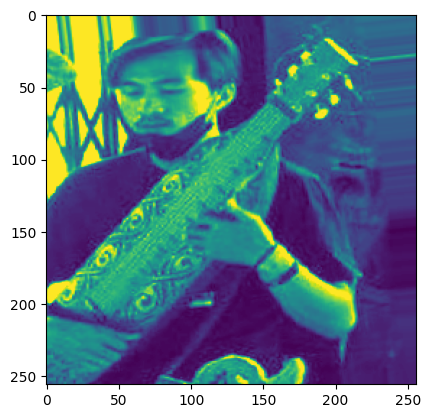

(20, 256, 256, 1)


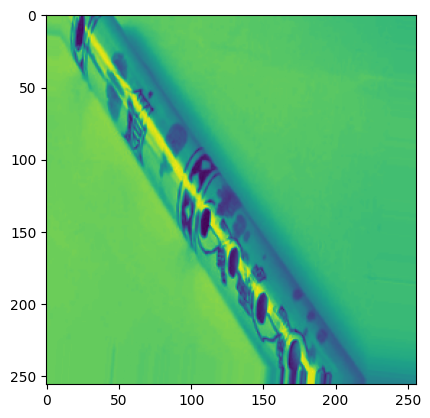

(20, 256, 256, 1)


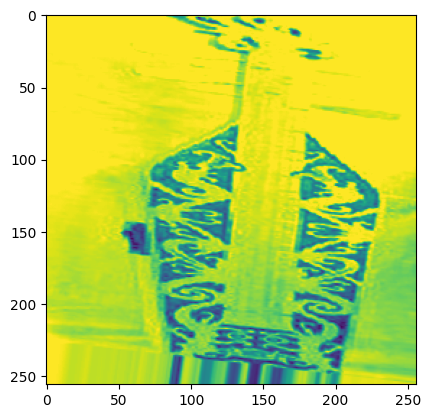

(20, 256, 256, 1)


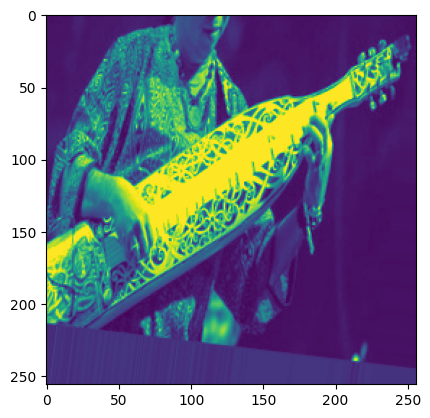

In [99]:
for _ in range(2):
    img, label = train_generator.next()
    plt.imshow(np.squeeze(img[0]))
    print(img.shape)
    plt.show()

for _ in range(2):
    img, label = val_generator.next()
    plt.imshow(np.squeeze(img[0]))
    print(img.shape)
    plt.show()

In [100]:
# Get the class details
class_details = val_generator.class_indices

# Print the class details
for class_name, class_index in class_details.items():
    print("Class:", class_name)
    print("Index:", class_index)

Class: Bonang
Index: 0
Class: Kolintang
Index: 1
Class: Rebab
Index: 2
Class: Saluang
Index: 3
Class: Sape
Index: 4
Class: Sasando
Index: 5
Class: Tifa
Index: 6


## Train Model

In [88]:
# model = create_final_model(pre_trained_model, last_output)
# history = model.fit(train_generator, epochs=40, verbose=1, validation_data=val_generator, callbacks=[Callback()])

Epoch 1/40


InvalidArgumentError: ignored

In [103]:
# learning_rate_reduction = ReduceLROnPlateau(
#     monitor='val_accuracy',
#     patience=2,
#     verbose=1,
#     factor=0.3,
#     min_lr=0.000001
# )

model.compile(
    optimizer="rmsprop",
    loss='categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs = 100,
    validation_data = val_generator,
    callbacks=[Callback()]
)

Epoch 1/100
26/26 [==============================] - 9s 247ms/step - loss: 2.4538 - accuracy: 0.1702 - val_loss: 1.9320 - val_accuracy: 0.2009
Epoch 2/100
26/26 [==============================] - 7s 265ms/step - loss: 1.9325 - accuracy: 0.2012 - val_loss: 1.9308 - val_accuracy: 0.2009
Epoch 3/100
26/26 [==============================] - 6s 240ms/step - loss: 1.9332 - accuracy: 0.1896 - val_loss: 1.9237 - val_accuracy: 0.2009
Epoch 4/100
26/26 [==============================] - 6s 241ms/step - loss: 1.9278 - accuracy: 0.2031 - val_loss: 1.9234 - val_accuracy: 0.2009
Epoch 5/100
26/26 [==============================] - 6s 224ms/step - loss: 1.9296 - accuracy: 0.1934 - val_loss: 1.9221 - val_accuracy: 0.2009
Epoch 6/100
26/26 [==============================] - 7s 271ms/step - loss: 1.9249 - accuracy: 0.1973 - val_loss: 1.9242 - val_accuracy: 0.2009
Epoch 7/100
26/26 [==============================] - 6s 227ms/step - loss: 1.9440 - accuracy: 0.1857 - val_loss: 1.9202 - val_accuracy: 0.2009

## Visualization

11/11 [==============================] - 4s 303ms/step - loss: 2.0484 - accuracy: 0.6530
Loss of the model is -  2.048412799835205
11/11 [==============================] - 2s 152ms/step - loss: 1.7927 - accuracy: 0.6484
Accuracy of the model is -  64.84017968177795 %
11/11 [==============================] - 2s 150ms/step
Classification Report
              precision    recall  f1-score   support

      Bonang       0.28      0.29      0.28        38
   Kolintang       0.09      0.10      0.10        30
       Rebab       0.10      0.10      0.10        20
     Saluang       0.04      0.03      0.04        32
        Sape       0.26      0.32      0.29        44
     Sasando       0.12      0.10      0.11        29
        Tifa       0.04      0.04      0.04        26

    accuracy                           0.16       219
   macro avg       0.13      0.14      0.14       219
weighted avg       0.15      0.16      0.15       219

Confusion Matrix


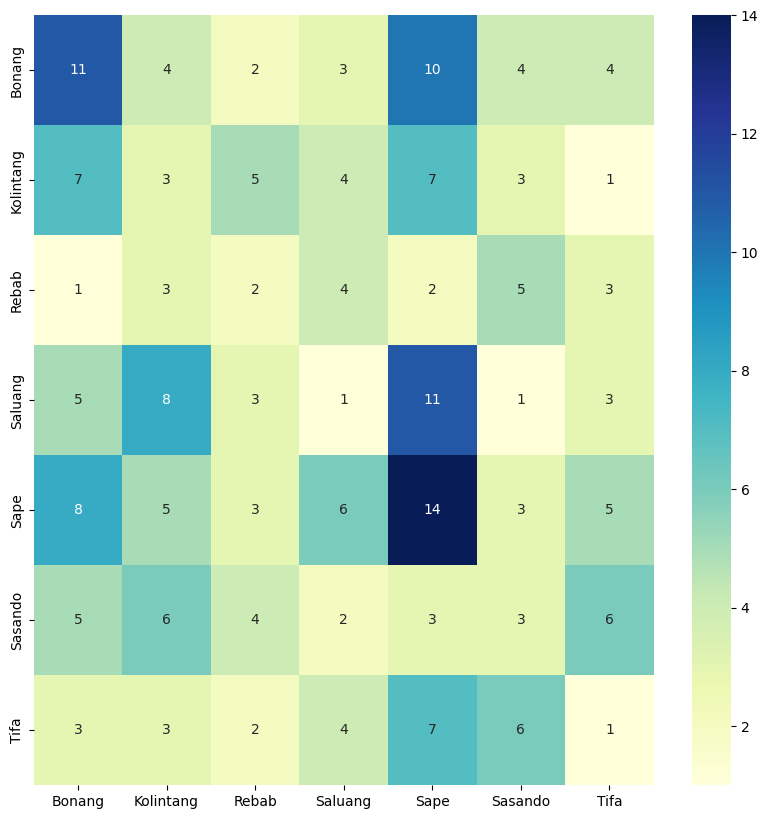

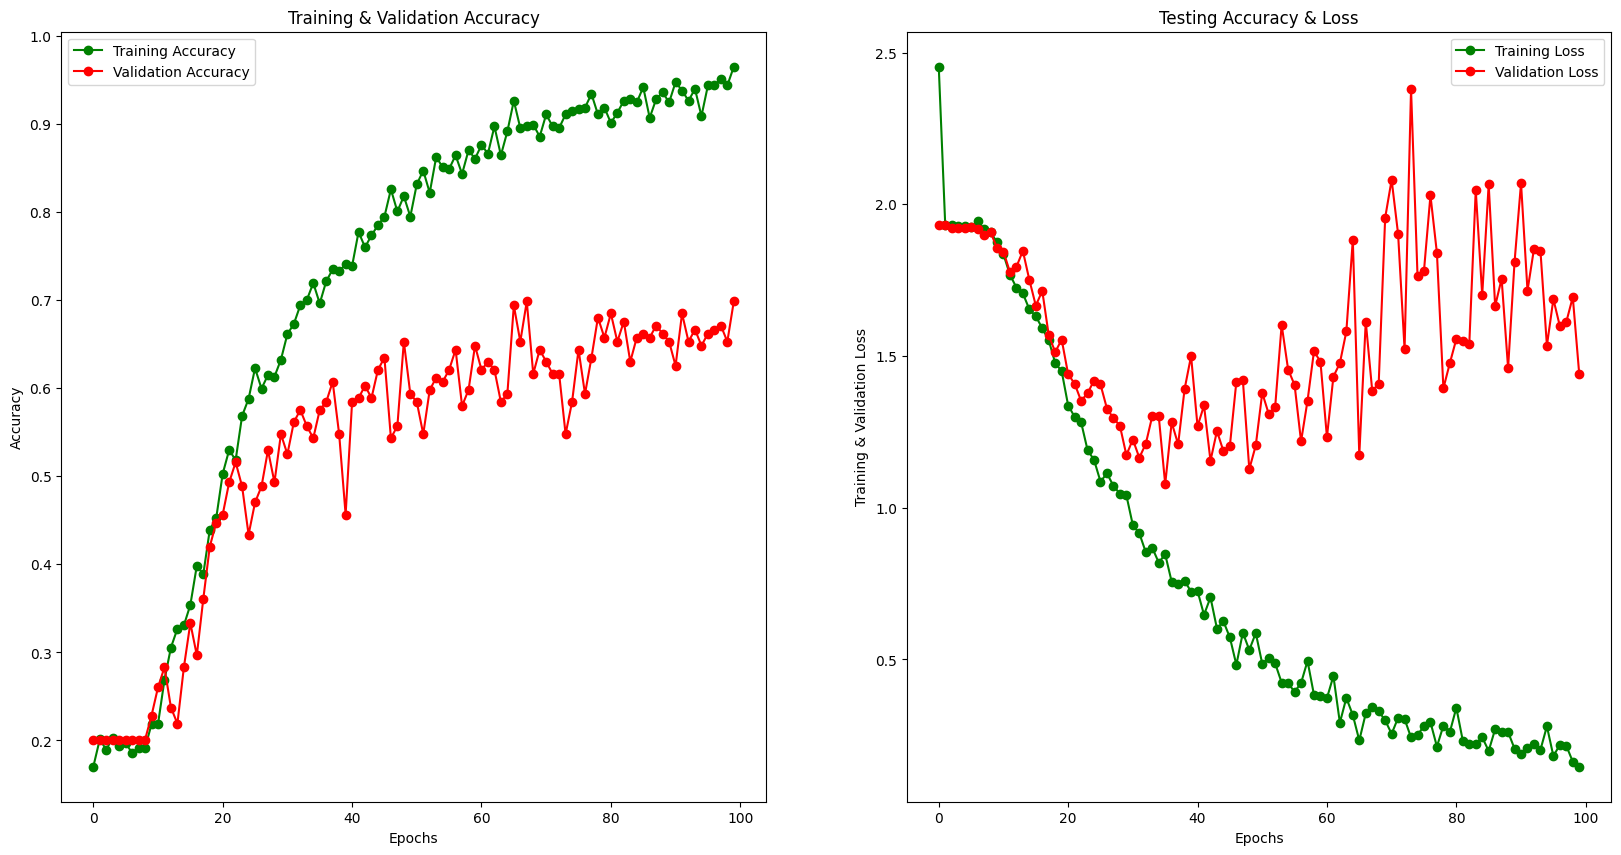

In [104]:
print("Loss of the model is - " , model.evaluate(val_generator)[0])
print("Accuracy of the model is - " , model.evaluate(val_generator)[1]*100 , "%")

def eval_plot(history):
    epochs=[i for i in range(100)]
    fig,ax=plt.subplots(1,2)
    train_acc=history.history['accuracy']
    train_loss=history.history['loss']
    val_acc=history.history['val_accuracy']
    val_loss=history.history['val_loss']
    fig.set_size_inches(20,10)

    ax[0].plot(epochs , train_acc , 'go-' , label='Training Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label='Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'g-o' , label='Training Loss')
    ax[1].plot(epochs , val_loss , 'r-o' , label='Validation Loss')
    ax[1].set_title('Testing Accuracy & Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")
    plt.show()

def evaluate(model):    
    Y_pred=model.predict(val_generator)
    y_pred=np.argmax(Y_pred, axis=1)

    print('Classification Report')
    target_names=['Bonang', 'Kolintang', 'Rebab', 'Saluang', 'Sape', 'Sasando', 'Tifa']
    print(classification_report(val_generator.classes, y_pred, target_names=target_names))

    print('Confusion Matrix')
    cm=confusion_matrix(val_generator.classes, y_pred)
    cm=pd.DataFrame(cm , index=['0','1','2', '3', '4', '5', '6'] , columns=['0','1','2', '3', '4', '5', '6'])
    plt.figure(figsize=(10,10))
    sns.heatmap(cm,
        cmap= "YlGnBu",
        annot=True,
        fmt='',
        xticklabels=['Bonang', 'Kolintang', 'Rebab', 'Saluang', 'Sape', 'Sasando', 'Tifa'],
        yticklabels=['Bonang', 'Kolintang', 'Rebab', 'Saluang', 'Sape', 'Sasando', 'Tifa'])

evaluate(model)
eval_plot(history)

## Testing Code

Saving 21_sasando.jpg to 21_sasando.jpg
1/1 [==============================] - 0s 23ms/step
21_sasando.jpg
Tifa
[0. 0. 0. 1. 0. 0. 0.]


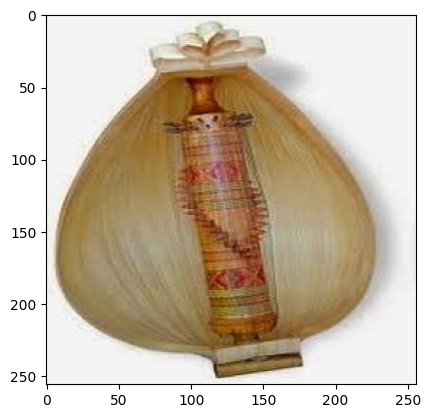

In [49]:
# from tensorflow.keras.preprocessing import image
# uploaded = files.upload()

# for fn in uploaded.keys():
#   path = fn
#   img = image.load_img(path, target_size = (256, 256))
#   imgplot = plt.imshow(img)
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis = 0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size = 10)

#   print(fn)
#   if classes[0][0] == 1:
#     print("Bonang")
#   elif classes[0][1] == 1:
#     print("Kolintang")
#   elif classes[0][2] == 1:
#     print("Rebab")
#   elif classes[0][3] == 1:
#     print("Saluang")
#   elif classes[0][4] == 1:
#     print("Sape")
#   elif classes[0][5] == 1:
#     print("Sasando")
#   elif classes[0][6] == 1:
#     print("Tifa")
#   else:
#     print("Unknown Image or Image Not Valid")

#   print(classes[0])

Saving 5_sasando.jpg to 5_sasando.jpg
1/1 [==============================] - 0s 19ms/step




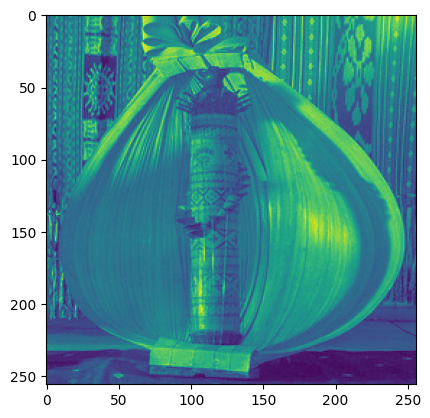


Image prediction result:  Sasando
Probability:  0.0 %




In [105]:
from tensorflow.keras.preprocessing import image

def prediksi_gambar(image_upload, model = model):
  im = image_upload
  im = np.asarray(im)
  im = im*(1/225)
  im_input = tf.reshape(im, shape = [1, 256, 256, 1])

  Y_pred = sorted(model.predict(im_input)[0])[2]
  y_pred = np.argmax(model.predict(im_input))
# ['Bonang', 'Kolintang', 'Rebab', 'Saluang', 'Sape', 'Sasando', 'Tifa']
  if y_pred == 0:
      label = 'Bonang'
  elif y_pred == 1:
      label = 'Kolintang'
  elif y_pred == 2:
      label = 'Rebab'
  elif y_pred == 3:
      label = 'Saluang'
  elif y_pred == 4:
      label = 'Sape'
  elif y_pred == 5:
      label = 'Sasando'
  else:
      label = 'Tifa'

  print('\n')
  plt.show()
  print("\nImage prediction result: ", label)
  print("Probability: ", round(Y_pred*100,2), "%")
  print('\n')

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(256,256), color_mode='grayscale')
  plt.imshow(img)

prediksi_gambar(img)

## Load the Model

In [111]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/ml_results/my_model')

loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_481 (Conv2D)         (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 128, 128, 32)      0         
                                                                 
 conv2d_482 (Conv2D)         (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 64, 64, 64)       

In [112]:
print(loaded_model.trainable_variables)

[<tf.Variable 'conv2d_481/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.072133  ,  0.10481243,  0.03105792,  0.02662111,
           0.06136081,  0.01797688, -0.07062683,  0.03932731,
          -0.11268012,  0.07891776, -0.01195514, -0.12547103,
          -0.03511164,  0.01132562, -0.02885335,  0.13961285,
          -0.00140784, -0.13013649,  0.08037318,  0.12877189,
           0.09259584, -0.06405585,  0.05674239,  0.0030138 ,
           0.07111058,  0.08190316, -0.08235087, -0.18559994,
           0.00363352,  0.09404972,  0.01201703,  0.14211728]],

        [[-0.17415741,  0.11348309, -0.03633628, -0.07667493,
          -0.08697586, -0.12257022, -0.17955887, -0.09799401,
           0.01132015,  0.06215079, -0.0912803 , -0.02461433,
          -0.16881119, -0.02121019,  0.00287924, -0.11091394,
          -0.08168536, -0.1339737 ,  0.08797017,  0.0349761 ,
          -0.00799287, -0.03573098,  0.11513835,  0.04220299,
          -0.0292131 ,  0.07210289, -0.1389055 ,  0

## Save The Model

In [107]:
model.save('/content/drive/MyDrive/ml_results/my_model')
model.save_weights('/content/drive/MyDrive/ml_results/my_weight')

tf.saved_model.save(
  model, '/content/drive/MyDrive/ml_results/my_model/my_model_saved_model')

## Convert Saved Model to TF-Lite

In [108]:
# Select mode of optimization
mode = "balanced" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [109]:
# EXERCISE: Use the TFLiteConverter SavedModel API to initialize the converter
export_dir = '/content/drive/MyDrive/ml_results/my_model'
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [110]:
tflite_model_file = pathlib.Path('/content/drive/MyDrive/ml_results/nusatala.tflite')
tflite_model_file.write_bytes(tflite_model)

4489720